**Tìm cạnh với thuật toán Sobel**

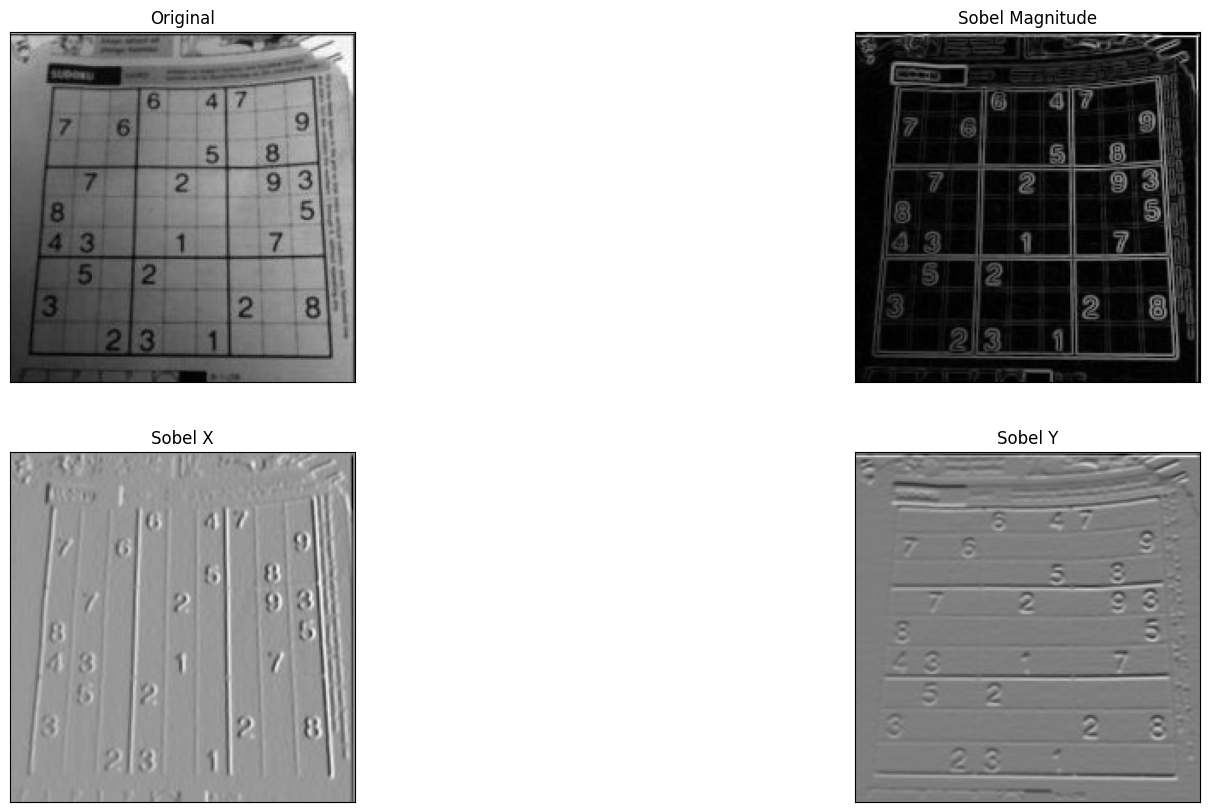

In [ ]:
import cv2
from skimage import io
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# img = cv2.imread('dave.jpg',0)
img = io.imread('/content/drive/MyDrive/Colab Notebooks/TÌM CẠNH/dave.jpg')
img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]],np.float32) # create a Sobel kernel
#Ix = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3) # if using OpenCV function
Ix = cv2.filter2D(img,3,kernel) # ddepth can set to -1, then automatically match with source
#Iy = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3) # if using OpenCV function
Iy = cv2.filter2D(img,3,kernel.transpose())

plt.figure(figsize=(20,10))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(np.sqrt(np.float32(Ix)**2+np.float32(Iy)**2),cmap = 'gray')
plt.title('Sobel Magnitude'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(Ix,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(Iy,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

# Show gradient of Sobel components with quiver plot

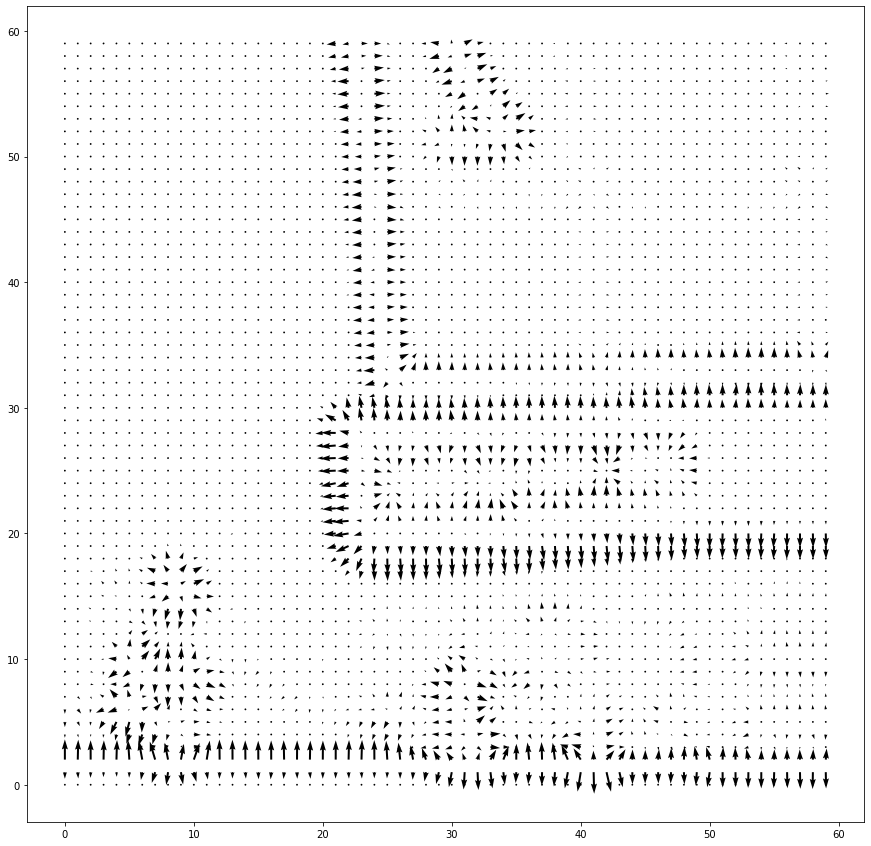

In [ ]:
w=60 # number of pixels included
X, Y= np.meshgrid(np.arange(Ix.shape[1]),np.arange(Ix.shape[0]))

plt.figure(figsize=(15,15))
plt.quiver(X[0:w,0:w],Y[0:w,0:w],Ix[0:w,0:w]/abs(Ix).max(),Iy[0:w,0:w]/abs(Iy).max(),units='width',scale=30)

# DoG from scratch

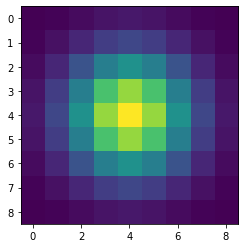

In [ ]:
from scipy.stats import norm

gkern1d=norm.pdf(np.linspace(norm.ppf(0.01),norm.ppf(0.99),9))
gkern2d=np.outer(gkern1d,gkern1d)

plt.imshow(gkern2d) # show gaussian filter (kernel)

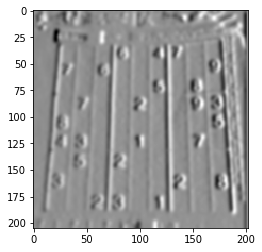

In [ ]:
# low pass with Gaussian filter and then filter with horizontal derivative
plt.imshow(cv2.filter2D(cv2.filter2D(np.float32(img),-1,gkern2d),-1,np.array([[-1,0,1]])),cmap='gray')

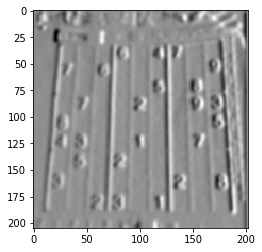

In [ ]:
# filter with DoG directly
from scipy.signal import convolve2d
DoG=convolve2d([[-1,0,1]],gkern2d) # create DoG filter
plt.imshow(cv2.filter2D(np.float32(img),-1,DoG),cmap='gray')

# Canny edge detector

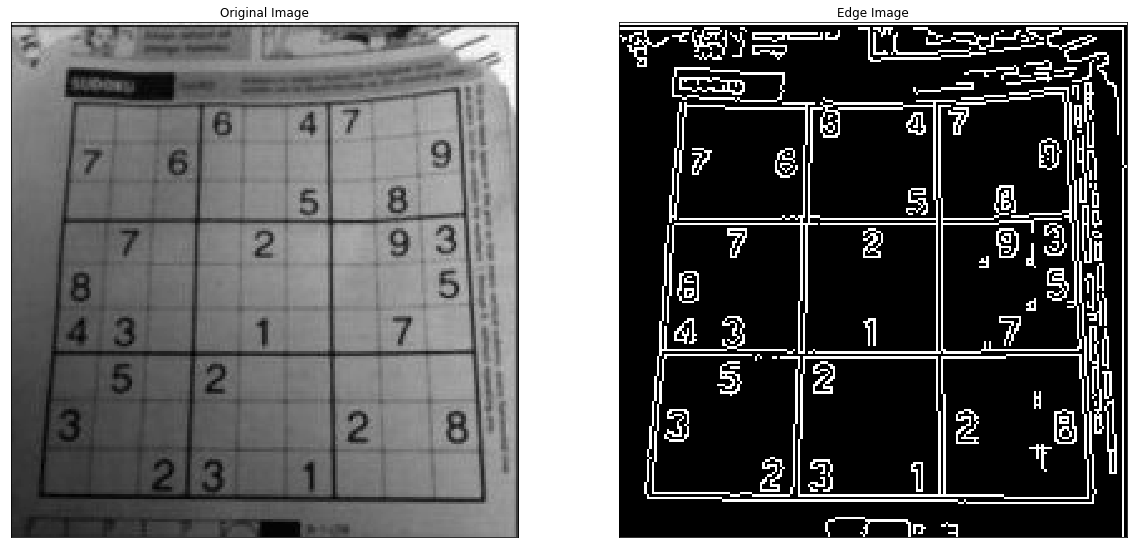

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

edges = cv2.Canny(img,100,200)

plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
# Canny demo from webcam

import cv2

cap = cv2.VideoCapture(0)
window_name='camera'

cv2.namedWindow(window_name,cv2.WND_PROP_FULLSCREEN)
cv2.setWindowProperty(window_name,cv2.WND_PROP_FULLSCREEN,cv2.WINDOW_FULLSCREEN)

while (True):
    ret, frame = cap.read()

    frame=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    frame = cv2.Canny(frame,30,70)

    cv2.imshow(window_name,frame)

    if cv2.waitKey(1) & 0xFF == ord('q'): # btw, you need to click the screen first. And then
                                         # press q to quit
        break

cap.release()
cv2.destroyAllWindows()